In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from matplotlib import patches as mpatches
plt.style.use('ggplot')
import seaborn as sns
import warnings
import imageio
import time

In [2]:
teams = pd.read_csv('teams.csv')

In [3]:
#pitching = pd.read_csv('pitching.csv')
people = pd.read_csv('people.csv')
batting = pd.read_csv('batting.csv')
#fielding = pd.read_csv('fielding.csv')
#hof = pd.read_csv('HallOfFame2.csv')
#ws = pd.read_csv('WS_Champs.csv')
teams_states = pd.read_csv('teamID_states.csv')
#team_costs = pd.read_csv('TeamCosts.csv')

In [4]:
# Convert all applicable items to numeric
teams = teams.apply(pd.to_numeric, errors='ignore')

# Fill the empty cells with 0. Has minimal impact on correlation 
# factors but allows for calculations in all categories
teams['HBP'] = teams['HBP'].fillna(0)
teams['SF'] = teams['SF'].fillna(0)
teams['attendance'] = teams['attendance'].fillna(0)
teams['WSWin'] = teams['WSWin'].fillna("N")

# Create columns for average attendance per game, winning percentage for season, OBP, SLG
teams['Average_Attendance'] = round(teams.attendance / teams.Ghome,1)
teams['W_pct'] = round(teams.W/(teams.W+teams.L),3)
teams['OBP'] = round((teams.H+teams.BB+teams.HBP)/(teams.AB+teams.BB+teams.HBP+teams.SF),3)
teams['SLG'] = round((teams['H']+teams['2B']+2*teams['3B']+3*teams['HR'])/teams['AB'],3)
teams['OPS'] = teams['OBP']+teams['SLG']
teams['BA'] = round(teams.H / (teams.AB-teams.HBP-teams.SF),3)
teams['R_Diff'] = teams.R-teams.RA
teams['OPS/ERA'] = round(teams.OPS/teams.ERA,5)

# Update certain columns to be based on counts per game (season lengths not consistent)
col_per_game = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 
                'HBP', 'SF', 'RA', 'ER', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'R_Diff']
for column in col_per_game:
    teams[f'{column}_PG'] = round(teams[column]/teams['G'],2)

teams.to_csv('Teams_Updated.csv')

In [5]:
teams2=teams.copy()
teams2 = teams2.drop(columns=['lgID', 'teamID', 'franchID', 'divID', 
                              'Rank', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 
                              'R', 'AB', 'H', '2B','3B', 'HR', 'BB', 'SO', 
                              'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'HA', 
                              'HRA', 'BBA', 'SOA', 'E', 'DP','park', 'attendance', 
                              'BPF', 'PPF', 'teamIDBR','teamIDlahman45', 'teamIDretro','R_Diff','IPouts',])
teams2.to_csv('Teams_Updated2.csv')
teams2.columns

Index(['yearID', 'G', 'Ghome', 'W', 'L', 'ERA', 'CG', 'SHO', 'SV', 'FP',
       'name', 'Average_Attendance', 'W_pct', 'OBP', 'SLG', 'OPS', 'BA',
       'OPS/ERA', 'R_PG', 'AB_PG', 'H_PG', '2B_PG', '3B_PG', 'HR_PG', 'BB_PG',
       'SO_PG', 'SB_PG', 'CS_PG', 'HBP_PG', 'SF_PG', 'RA_PG', 'ER_PG', 'HA_PG',
       'HRA_PG', 'BBA_PG', 'SOA_PG', 'E_PG', 'DP_PG', 'R_Diff_PG'],
      dtype='object')

In [6]:
overall = teams2.corr(numeric_only=True)[['W_pct']].abs().sort_values('W_pct',ascending=False).drop(index = ['W_pct','W','L'])

start_year = 1871
end_year = 1900
era1 = (teams2.loc[(teams2["yearID"] >= start_year) & (teams2["yearID"] <= end_year)]).corr(numeric_only=True)[['W_pct']].abs().sort_values('W_pct',ascending=False).drop(index = ['W_pct','W','L'])

start_year = 1900
end_year = 1920
era2 = (teams2.loc[(teams2["yearID"] >= start_year) & (teams2["yearID"] <= end_year)]).corr(numeric_only=True)[['W_pct']].abs().sort_values('W_pct',ascending=False).drop(index = ['W_pct','W','L'])

start_year = 1920
end_year = 2023
era3 = (teams2.loc[(teams2["yearID"] >= start_year) & (teams2["yearID"] <= end_year)]).corr(numeric_only=True)[['W_pct']].abs().sort_values('W_pct',ascending=False).drop(index = ['W_pct','W','L'])

start_year = 1960
end_year = 2023
era4 = (teams2.loc[(teams2["yearID"] >= start_year) & (teams2["yearID"] <= end_year)]).corr(numeric_only=True)[['W_pct']].abs().sort_values('W_pct',ascending=False).drop(index = ['W_pct','W','L'])

start_year = 1984
end_year = 2005
era5 = (teams2.loc[(teams2["yearID"] >= start_year) & (teams2["yearID"] <= end_year)]).corr(numeric_only=True)[['W_pct']].abs().sort_values('W_pct',ascending=False).drop(index = ['W_pct','W','L'])

start_year = 1900
end_year = 2023
era6 = (teams2.loc[(teams2["yearID"] >= start_year) & (teams2["yearID"] <= end_year)]).corr(numeric_only=True)[['W_pct']].abs().sort_values('W_pct',ascending=False).drop(index = ['W_pct','W','L'])


for count in range(2,6):
    overall_top = overall.index.values.tolist()[0:count]
    era1_top = era1.index.values.tolist()[0:count]
    era2_top = era2.index.values.tolist()[0:count]
    era3_top = era3.index.values.tolist()[0:count]
    era4_top = era4.index.values.tolist()[0:count]
    era5_top = era5.index.values.tolist()[0:count]
    era6_top = era6.index.values.tolist()[0:count]

    mylist = overall_top + era1_top + era2_top + era3_top + era4_top + era5_top + era6_top
    myset = set(mylist)

    print(f'Top {count} per ERA: {myset}')

    #print(f'ALLTIME: {overall_top} \nERA 1: {era1_top}\nERA 2: {era2_top}\nERA 3: {era3_top}\nERA 4: {era4_top}\nERA 5: {era5_top}\nERA 6: {era6_top}\n')


overall

Top 2 per ERA: {'OPS/ERA', 'R_Diff_PG'}
Top 3 per ERA: {'OPS/ERA', 'SV', 'RA_PG', 'R_Diff_PG', 'Average_Attendance'}
Top 4 per ERA: {'SLG', 'OPS/ERA', 'SV', 'RA_PG', 'HA_PG', 'ERA', 'R_Diff_PG', 'Average_Attendance', 'R_PG'}
Top 5 per ERA: {'ER_PG', 'SLG', 'OPS/ERA', 'SV', 'RA_PG', 'OBP', 'HA_PG', 'ERA', 'R_Diff_PG', 'Average_Attendance', 'R_PG'}


,W_pct
R_Diff_PG,0.893076
OPS/ERA,0.700989
RA_PG,0.526539
HA_PG,0.479528
OBP,0.477841
ERA,0.474014
OPS,0.464910
ER_PG,0.459790
BA,0.450524
SHO,0.439201


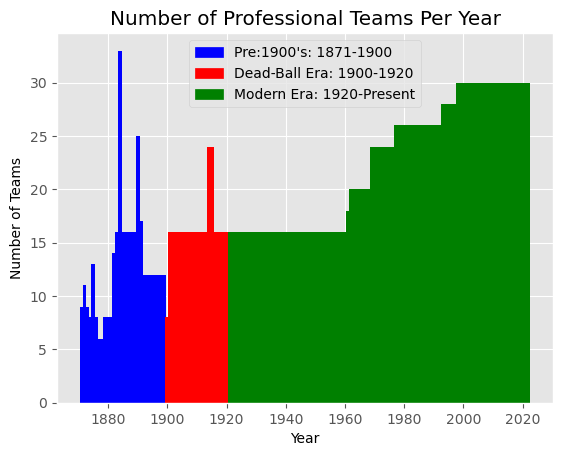

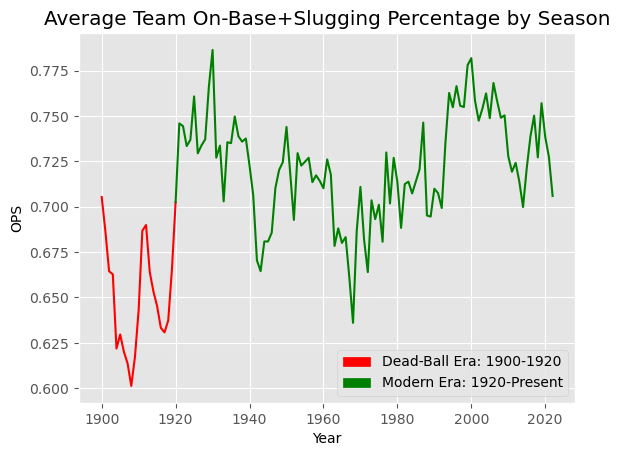

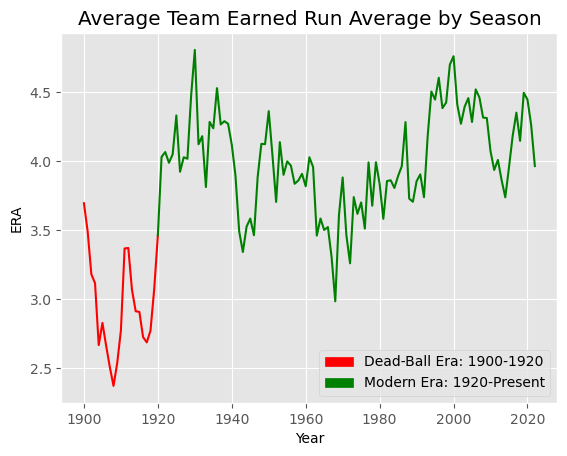

In [7]:
fig, ax1 = plt.subplots()
w=1.25
ax1.bar(list(range(1871,1901)),teams.groupby('yearID')['franchID'].count().loc[1871:1900],color='blue',width=w)
ax1.bar(list(range(1900,1921)),teams.groupby('yearID')['franchID'].count().loc[1900:1920],color='red',width=w)
ax1.bar(list(range(1921,2023)),teams.groupby('yearID')['franchID'].count().loc[1921:2023],color='green',width=w)
plt.title('Number of Professional Teams Per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Teams')
blue_patch = mpatches.Patch(color='blue', label='Pre:1900\'s: 1871-1900')
red_patch = mpatches.Patch(color='red', label='Dead-Ball Era: 1900-1920')
green_patch = mpatches.Patch(color='green',label='Modern Era: 1920-Present')
ax1.legend(handles=[blue_patch,red_patch,green_patch])

fig, ax2 = plt.subplots()
# ax2.plot(teams.groupby('yearID')['OPS'].mean().loc[1871:1900],color='blue')
ax2.plot(teams.groupby('yearID')['OPS'].mean().loc[1900:1920],color='red')
ax2.plot(teams.groupby('yearID')['OPS'].mean().loc[1920:2023],color='green')

plt.title('Average Team On-Base+Slugging Percentage by Season')
ax2.set_xlabel('Year')
ax2.set_ylabel('OPS')
blue_patch = mpatches.Patch(color='blue', label='Pre:1900\'s: 1871-1900')
red_patch = mpatches.Patch(color='red', label='Dead-Ball Era: 1900-1920')
green_patch = mpatches.Patch(color='green',label='Modern Era: 1920-Present')
ax2.legend(handles=[red_patch,green_patch])

fig, ax5 = plt.subplots()
# ax5.plot(teams.groupby('yearID')['R_PG'].mean().loc[1871:1900],color='blue')
ax5.plot(teams.groupby('yearID')['ERA'].mean().loc[1900:1920],color='red')
ax5.plot(teams.groupby('yearID')['ERA'].mean().loc[1920:2023],color='green')

plt.title('Average Team Earned Run Average by Season')
ax5.set_xlabel('Year')
ax5.set_ylabel('ERA')
blue_patch = mpatches.Patch(color='blue', label='Pre:1900\'s: 1871-1900')
red_patch = mpatches.Patch(color='red', label='Dead-Ball Era: 1900-1920')
green_patch = mpatches.Patch(color='green',label='Modern Era: 1920-Present')
ax5.legend(handles=[red_patch,green_patch])

# Boxplot Function

In [8]:
def box_plot_by_year(column, df, start_year=1871, end_year=2023):
    '''
    input desired column from datatable as a string
    input desired start and end years for searching
    
    return boxplot for column in selected year range
    '''
    # Create an empty dictionary to store the data for each year
    data_dict = {}

    # Loop through each year in the dataframe
    for year in df.loc[(df["yearID"] >= start_year) & (df["yearID"] <= end_year)]["yearID"].unique():
        
        # Filter the dataframe to include only the data for the specified year
        year_df = df.loc[df["yearID"] == year]

        # Calculate the difference between the highest and lowest value in the specified column
        avg = year_df[column].mean()
        std = year_df[column].std()

        # Add the data to the dictionary
        data_dict[year] = year_df[column]        

    data_list = [data_dict[year].tolist() for year in data_dict]

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the box plot
    bp = ax.boxplot(data_list, showmeans=True)

    # Set the title and axis labels
    ax.set_title(f"{column} by year")
    ax.set_xlabel("Year")
    ax.set_ylabel(column)
    x_ticks = df.loc[(df["yearID"] >= start_year) & (df["yearID"] <= end_year)]["yearID"].unique()
    plt.xticks(range(len(x_ticks)), x_ticks)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(int((end_year-start_year)/6)))
    ax.xaxis.set_minor_locator(ticker.MaxNLocator(10))


    # Add a horizontal line for the mean
    mean_line = ax.axhline(y=df[column].mean(), color="r", linestyle="--", label="Overall Mean")

    # Add a legend for the mean line
    ax.legend(handles=[mean_line])

    # Add error bars for the standard deviation
    for i, year in enumerate(data_dict):
        x = i + 1  # The x position of the box plot for this year
        y = data_dict[year].mean()  # The mean value for this year
        std = data_dict[year].std()  # The standard deviation for this year
        ax.errorbar(x, y, yerr=std, color="k", fmt="none")

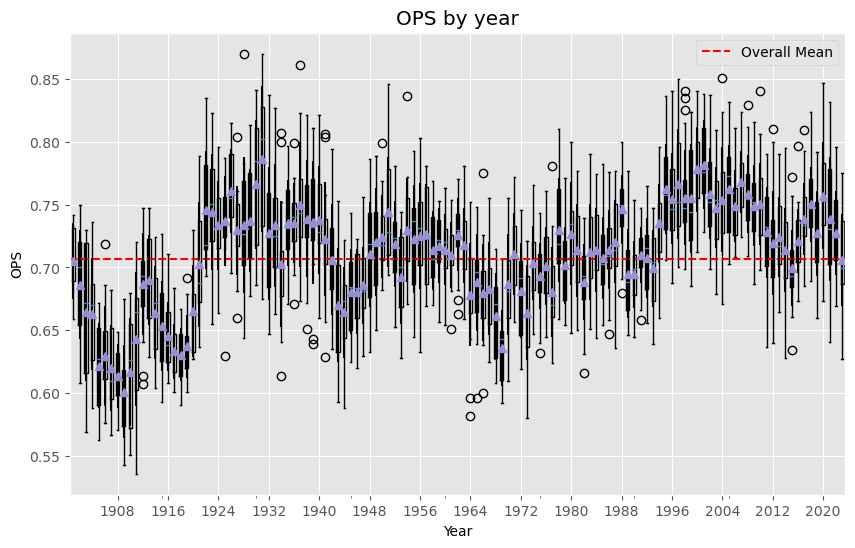

In [9]:
start = 1900
end = 2023

# box_plot_by_year('OBP',teams3,start,end)
# box_plot_by_year('ERA',start,end)
# box_plot_by_year('SLG',start,end)
box_plot_by_year('OPS',teams,start,end)

# Team Name Change History

In [10]:
def team_name_history(team,df,start_year=1871,end_year=2023):
    '''
    input team abbreviation
    optionally input start/end years
    
    output dataframe with team names over 
    the (selected) years and what year it changed
    
    '''
    team = team.upper()
    # Prevent n/a entries from working
    if team not in df['franchID'].unique():
        raise ValueError(f'There is no team {team} in the database')
    
    # Find first year team existed
    tfy_index = (df['franchID'].values == team).argmax()
    tfy = teams.loc[teams.index == tfy_index]['yearID'].item()
    
    # Find last year team existed
    tly_index = len(teams['franchID']) - np.argmax(teams['franchID'][::-1].values==team) - 1
    tly = teams.loc[teams.index == tly_index]['yearID'].item()
    
    # Find current team name
    tcn_index = len(teams['franchID']) - np.argmax(teams['franchID'][::-1].values==team) - 1
    tcn = teams.loc[teams.index == tcn_index]['name'].item()
    
    # Update code in case start year is before team existed
    if tfy > start_year:
        start_year = tfy
    
    # Update code in case end year is after team folded.
    if tly < end_year:
        end_year = tly
    
    # Pull lines with team in existence in to separate df
    temp_df = df.loc[df['franchID'] == team].reset_index()
    
    # Team name at time of founding
    newname = temp_df['name'][0]
    
    print(f'{tcn} name change history:\n')
    print(f'In {tfy} the team was founded as the {newname}')
    
    # Printing new lines each time name is changed
    for i in range(end_year-tfy):
        if temp_df['name'][i] != newname:
            newname = temp_df['name'][i]
            print(f'In {(temp_df.yearID[i])} the team was renamed the {newname}')
    
    if tly != 2022:
        print(f'\nThe {tcn} no longer exist.  Their last season was {tly}')
    print("\n")

In [11]:
teams.loc[teams.yearID == 2022][['franchID','name']]

,franchID,name
2985,ARI,Arizona Diamondbacks
2986,ATL,Atlanta Braves
2987,BAL,Baltimore Orioles
2988,BOS,Boston Red Sox
2989,CHW,Chicago White Sox
2990,CHC,Chicago Cubs
2991,CIN,Cincinnati Reds
2992,CLE,Cleveland Guardians
2993,COL,Colorado Rockies
2994,DET,Detroit Tigers


In [12]:
team_name_history('BOS',teams)
team_name_history('NYY',teams)

Boston Red Sox name change history:

In 1901 the team was founded as the Boston Americans
In 1908 the team was renamed the Boston Red Sox


New York Yankees name change history:

In 1901 the team was founded as the Baltimore Orioles
In 1903 the team was renamed the New York Highlanders
In 1913 the team was renamed the New York Yankees




## Correlation by column with top 3 in each category highlighted

In [13]:
def top3_by_stat(column,vs='mean',start_year=1871,end_year=2023,cutoff=False,Dstat=False,bestfit=False):
    '''
    input desired column from datatable as a string
    input data table to search
    input specific team to compare against max/min/mean (default mean)
    input desired start and end years for searching
    input cutoff as T/F to shorten graph to only years team has played
    
    returns a graph showing the average value against
        the team value of the specified column for each year
    '''
    df = teams.loc[(teams["yearID"] >= start_year) & (teams["yearID"] <= end_year)]
        
    # Prevent 150 lines of future warnings
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)


    # Create an empty dataframe to store the results
    results_df = pd.DataFrame()

    # Loop through selected years in the dataframe
    for year in df["yearID"].unique():

        # Filter the dataframe to include only the data for the specified year
        current_year_df = df.loc[df["yearID"] == year]
        
        if Dstat:
            top3s = current_year_df.nsmallest(3, [column])[[column,'franchID','W_pct','yearID']]
        else:
            top3s = current_year_df.nlargest(3, [column])[[column,'franchID','W_pct','yearID']]
                    
        # Append the results to the results dataframe
        for i in list(top3s.index):
            results_df = results_df.append(teams.iloc[i])
    
    # Convert year column into intgers
    results_df['yearID'] = results_df['yearID'].astype(int)

    #BESTFIT
    if bestfit:
        x1 = results_df["yearID"]
        y1 = results_df["W_pct"]
        x2 = df["yearID"]
        y2 = df["W_pct"]
        b1, m1 = polyfit(x1, y1, 1)
        b2, m2 = polyfit(x2, y2, 1)
        plt.plot(x1, b1 + m1 * x1, color='black',linestyle='--', linewidth=2)
        plt.plot(x2, b2 + m2 * x2, color='black',linestyle='--', linewidth=2)
    
    plt.scatter(df["yearID"],df["W_pct"],color='green',alpha=0.25)
    plt.scatter(results_df["yearID"],results_df["W_pct"],color='red',alpha=.75)
    plt.title(f'Winning Percentages Sorted by {column}')
    plt.xlabel('Year/Season')
    plt.ylabel(f'Winning Percentages')
    
    red_patch = mpatches.Patch(color='red', label=f'Team with {column} in Top 3')
    green_patch = mpatches.Patch(color='green', label='All Teams')
    plt.legend(handles=[red_patch,green_patch])
    
#     plt.savefig(f'./img/_{column}.png', 
#                 transparent = False,  
#                 facecolor = 'white')
#     plt.close()

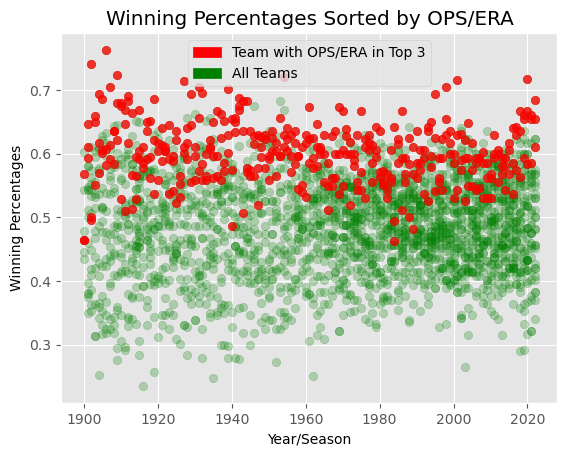

In [14]:
top3_by_stat('OPS/ERA',start_year=1900)

In [ ]:
overall_stats=['R_Diff_PG', 'RA_PG', 'HA_PG', 'OBP', 'ERA', 'OPS', 'ER_PG', 'BA',
       'SHO', 'R_PG', 'SLG', 'H_PG', '2B_PG', 'BB_PG',
       'Average_Attendance', 'SV', 'E_PG', 'FP', 'HR_PG', 'BBA_PG',
       'SOA_PG', 'SB_PG', '3B_PG', 'AB_PG', 'G', 'CG', 'HRA_PG',
       'SF_PG', 'HBP_PG', 'SO_PG', 'Ghome', 'DP_PG', 'CS_PG']

o_stats=['R_Diff_PG','OBP', 'OPS', 'BA',
       'SHO', 'R_PG', 'SLG', 'H_PG', '2B_PG', 'BB_PG',
       'Average_Attendance', 'SV', 'FP', 'HR_PG', 
       'SOA_PG', 'SB_PG',  '3B_PG', 'AB_PG', 'G', 'CG',
       'SF_PG', 'HBP_PG', 'Ghome', 'DP_PG']
d_stats=['RA_PG', 'HA_PG','ERA', 'ER_PG','E_PG', 'BBA_PG','SO_PG', 'CS_PG', 'HRA_PG',]

start_time = time.time()
for t in o_stats:
    top3_by_stat(t,start_year=1900,Dstat=False)
for t in d_stats:
    top3_by_stat(t,start_year=1900,Dstat=True)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
overall_stats=['R_Diff_PG', 'RA_PG', 'HA_PG', 'OBP', 'ERA', 'OPS', 'ER_PG', 'BA',
       'SHO', 'R_PG', 'SLG', 'H_PG', '2B_PG', 'BB_PG',
       'Average_Attendance', 'SV', 'E_PG', 'FP', 'HR_PG', 'BBA_PG',
       'SOA_PG', 'SB_PG', '3B_PG', 'AB_PG', 'G', 'CG', 'HRA_PG',
       'SF_PG', 'HBP_PG', 'SO_PG', 'Ghome', 'DP_PG', 'CS_PG']
frames = []
for t in overall_stats:
    image = imageio.v2.imread(f'./img/_{t}.png')
    frames.append(image)

imageio.mimsave('./img/Correlation.gif', frames, fps=.75)

## Scatterplots showing teams in top 3 and above average and where they fall

In [16]:
def top_shown_scatter(column,start_year = 1871,end_year = 2023,Dstat=False):

    # Prevent 150 lines of future warnings
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    # Create an empty dataframe to store the results
    results_df = pd.DataFrame()

    # start_time = time.time()

    for team in list(teams.franchID.unique()):

        # Loop through selected years in the dataframe
        for year in teams.loc[(teams["yearID"] >= start_year) & (teams["yearID"] <= end_year)]["yearID"].unique():

            # Filter the dataframe to include only the data for the specified year
            current_year_df = teams.loc[teams["yearID"] == year]

            # Calculate the difference between the highest and lowest value in the specified column
            if Dstat:
                team_value = current_year_df.loc[current_year_df['franchID'] == team,column].min()
                team_w_pct = current_year_df.loc[current_year_df['franchID'] == team,'W_pct'].min()
                avg = round(current_year_df[column].mean(),3)
                if team_value <= avg:
                    above_avg = True
                else:
                    above_avg = False

                if team_value <= current_year_df.nsmallest(5, [column])[column].max():
                    top5 = True
                else:
                    top5 = False
            else:
                team_value = current_year_df.loc[current_year_df['franchID'] == team,column].max()
                team_w_pct = current_year_df.loc[current_year_df['franchID'] == team,'W_pct'].max()
                avg = round(current_year_df[column].mean(),3)
                if team_value >= avg:
                    above_avg = True
                else:
                    above_avg = False

                if team_value >= current_year_df.nlargest(5, [column])[column].min():
                    top5 = True
                else:
                    top5 = False
                
                
                
                
            # Append the results to the results dataframe only including the above average teams

            if above_avg:
                results_df = results_df.append({
                                                "yearID": year, 
                                                f"mean_{column}": avg,
                                                "above_avg": above_avg,
                                                "top5": top5,
                                                "team_name": team,
                                                f"team_{column}": team_value,
                                                f"team_W_pct": team_w_pct
                                               },
                                                ignore_index=True)

    # print("--- %s seconds ---" % (time.time() - start_time))
    # 1 year takes .165 seconds. So 150 years should take ~25 seconds
    top5df = results_df.loc[results_df.top5]
    teams_years_speced = teams.loc[(teams["yearID"] >= start_year) & (teams["yearID"] <= end_year)]
    
    
    # Adding Legend
    fig, ax = plt.subplots()
    red_patch = mpatches.Patch(color='red', label='Team in top 5 for season')
    green_patch = mpatches.Patch(color='green', label='All Data')
    blue_patch = mpatches.Patch(color='blue', label='Team above season mean')
    ax.legend(handles=[red_patch,blue_patch,green_patch])
    
    
    plot2 = ax.scatter(teams_years_speced[f'{column}'],teams_years_speced['W_pct'],alpha=.25,c='green')
    plot1 = ax.scatter(results_df[f"team_{column}"],results_df['team_W_pct'],alpha=.25,c='blue')
    plot0 = ax.scatter(top5df[f"team_{column}"],top5df['team_W_pct'],alpha=.25,c='red')

    plt.xlabel(f'Season {column}')
    plt.ylabel('Season Winning Percentage')
    plt.title(f'{column} v. Winning Percentage {start_year}-{end_year}')
    ax.grid(True)
    
    # Adding Bestfit
    x1 = teams_years_speced[f'{column}']
    y1 = teams_years_speced['W_pct']
    
    x2 = results_df[f"team_{column}"]
    y2 = results_df['team_W_pct']
    
    x3 = top5df[f"team_{column}"]
    y3 = top5df['team_W_pct']

    # Best Fit line using polyfit
    b1, m1 = polyfit(x1, y1, 1)
    plt.plot(x1, b1 + m1 * x1, color='green',linestyle='--', linewidth=2)
    b2, m2 = polyfit(x2, y2, 1)    
    plt.plot(x2, b2 + m2 * x2, color='blue',linestyle='--', linewidth=2)
    b3, m3 = polyfit(x3, y3, 1)    
    plt.plot(x3, b3 + m3 * x3, color='red',linestyle='--', linewidth=2)

--- 12.641990184783936 seconds ---


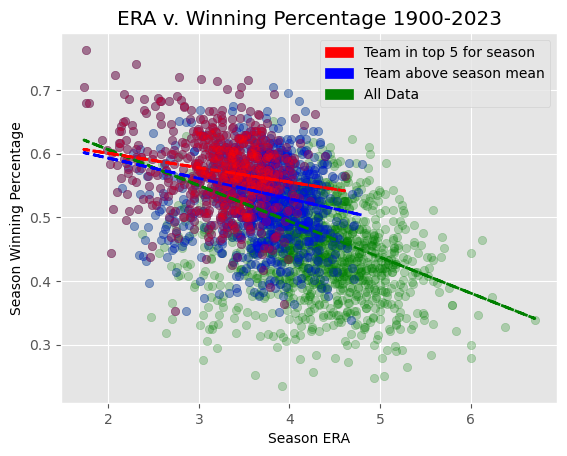

In [17]:
start_time = time.time()
top_shown_scatter('ERA',start_year = 1900,end_year = 2023,Dstat=True)
# top_shown_scatter('OPS')

print("--- %s seconds ---" % (time.time() - start_time))

## Create table showing max and min values for each statistic
Secondary table shows differential between max and min

Allows for ability to turn on dots for where team with highest winning % fell (or WS winner)

In [18]:
def max_min_table(df,column,start_year=1871,end_year=2023,wswinner=False,bestrecord=False):
    '''
    input desired column from datatable as a string
    input desired start and end years for searching
    
    returns a graph showing the maximum and minimum 
        of the column for each year
    '''

    # Prevent 150 lines of future warnings
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    if bestrecord:
        wswinner = False
    
    if wswinner & start_year<1903:
        start_year=1903
    
    # Filter by selected years
    df = df.loc[(df["yearID"] >= start_year) & (df["yearID"] <= end_year)]
    
    
    # Create an empty dataframe to store the results
    results_df = pd.DataFrame(columns=["yearID", f"max_{column}",
                                       f"min_{column}", f"mean_{column}","percent_change","std"])

    # Loop through each year in the dataframe
    for year in df["yearID"].unique():

        # Filter the dataframe to include only the data for the specified year
        current_year_df = df.loc[df["yearID"] == year]

        # Calculate the difference between the highest and lowest value in the specified column
        wswin = current_year_df.loc[current_year_df.WSWin=="Y"][column].max()
        best = current_year_df.loc[current_year_df.W_pct==current_year_df.W_pct.max()][column].max()
        max_ = current_year_df[column].max()
        min_ = current_year_df[column].min()
        avg = current_year_df[column].mean()
        std = current_year_df[column].std()
        diff = max_ - min_

        # Append the results to the results dataframe
        results_df = results_df.append({"wswin":wswin,"yearID": year, f"max_{column}":max_,f"min_{column}":min_,
                                        f"mean_{column}":avg,'bestrecord':best,
                                        "std":std,"max_min_diff":diff},ignore_index=True)
    
    # Convert year column into intgers
    results_df['yearID'] = results_df['yearID'].astype(int)
    

    # Graph Info
    overlapping=.5   # Opacity 
    color1 = 'red' # Setting line 1
    data1 = f"max_{column}"
    color2 = 'green'   # Setting line 2
    data2 = f"min_{column}"
    color3 = 'blue'   # Setting line 3
    data3 = 'max_min_diff'
    
    
    fig, ax = plt.subplots()
    red_patch = mpatches.Patch(color=color1, label=data1)
    green_patch = mpatches.Patch(color=color2, label=data2)
    blue_patch = mpatches.Patch(color=color3, label=data3)
    blue2_patch = mpatches.Patch(color='blue',label="WS Winner")
    blue3_patch = mpatches.Patch(color=color3, label=f"{column} Difference")
    blue4_patch = mpatches.Patch(color='blue',label="Team With Best Record")
    
    if bestrecord:
        ax.legend(handles=[red_patch,green_patch,blue4_patch])
    elif wswinner:
        ax.legend(handles=[red_patch,green_patch,blue2_patch])    
    else:
        ax.legend(handles=[red_patch,green_patch])
        
    # Set Line 1 parameters
    x1 = results_df['yearID']
    y1 = results_df[data1]
    y2 = results_df[data2]
    y3 = results_df["wswin"].interpolate(method = "linear")
    y4 = results_df["bestrecord"]
    
    y30 = results_df[data3]
    


    # Best Fit line using polyfit
    b1, m1 = polyfit(x1, y1, 1)
    plt.plot(x1, b1 + m1 * x1, color=color1,linestyle='--', linewidth=2)
    b2, m2 = polyfit(x1, y2, 1)    
    plt.plot(x1, b2 + m2 * x1, color=color2,linestyle='--', linewidth=2)
       
    line1 = plt.plot(x1,y1,c=color1, alpha=overlapping, lw=2)
    line2 = plt.plot(x1,y2,c=color2, alpha=overlapping, lw=2)    
    
    if wswinner:
        b3, m3 = polyfit(x1, y3, 1)    
        plt.plot(x1, b3 + m3 * x1, color=color3,linestyle='--', linewidth=2)
        plt.scatter(x1,results_df["wswin"],c='blue')
        
    if bestrecord:
        b4, m4 = polyfit(x1, y4, 1)    
        plt.plot(x1, b4 + m4 * x1, color=color3,linestyle='--', linewidth=2)
        plt.scatter(x1,results_df["bestrecord"],c='blue')
        
    plt.xlabel("Year/Season")
    plt.ylabel(f"{column}")
    plt.title(f"Max and Min {column} Per Season")
    plt.show()
    

    # Figure 2
    fig2, ax2 = plt.subplots()
    b3, m3 = polyfit(x1, y30, 1)
    plt.plot(x1, b3 + m3 * x1, color=color3,linestyle='--', linewidth=2)
    line3 = plt.plot(x1,y30,c='blue', alpha=overlapping, lw=2)
    ax2.legend(handles=[blue_patch])
    plt.xlabel("Year/Season")
    plt.ylabel(f"{column}")
    plt.title(f"Difference between Max and Min {column} Per Season")
    plt.show()




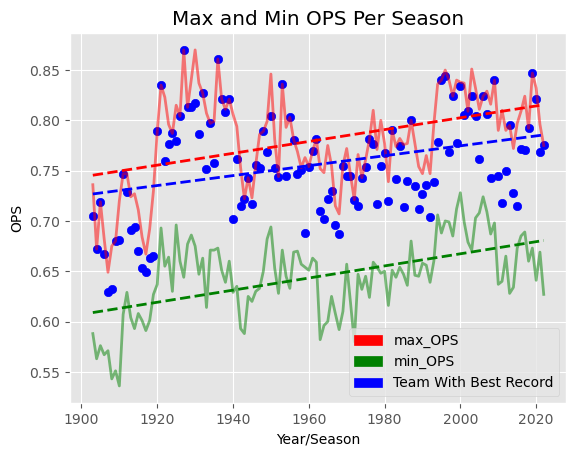

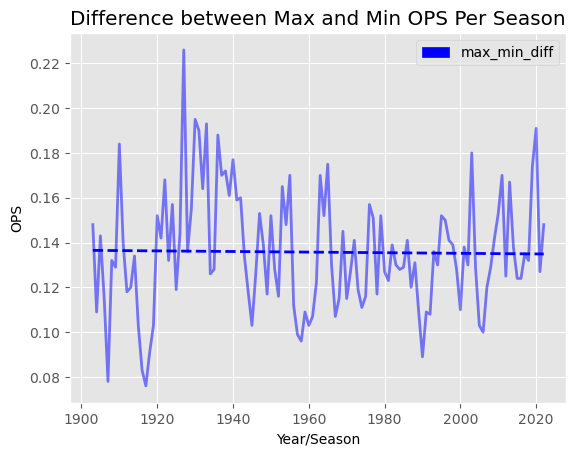

In [19]:
max_min_table(teams,'OPS',1900,2023,wswinner=True,bestrecord=True)

In [20]:
batting = batting.apply(pd.to_numeric, errors='ignore')

batting['BA'] = round(batting.H / batting.AB,3)

max_ba1 = pd.DataFrame(np.arange(1871,2023))
max_ba1.columns=['yearID']
max_ba2 = batting.loc[batting['AB']>502].groupby('yearID').agg('max')[['BA']].reset_index()
max_ba = pd.merge(max_ba1,max_ba2,how='left')
max_ba.columns = ['max_ba' if x=='BA' else x for x in max_ba.columns]
batting = batting.merge(max_ba,on='yearID')

In [22]:
a = batting.merge(people,on='playerID')
b = a.merge(teams_states[['State','teamID']], on = 'teamID')
c= b.loc[b.AB >502]
print('Batting Average for players who play in home states:')
print(round(b.loc[b.birthState == b.State].groupby('playerID').first()['BA'].mean(),3))
print('Batting Average for players who play out of home states:')
print(round(b.loc[b.birthState == b.State].groupby('playerID').first()['BA'].mean(),3))
print('Batting Average for players who play in home states (over 500 ABs):')
print(round(c.loc[c.birthState == c.State].groupby('playerID').first()['BA'].mean(),3))
print('Batting Average for players who play out of home states (over 500 ABs):')
print(round(c.loc[c.birthState != c.State].groupby('playerID').first()['BA'].mean(),3))

# NO SIGNIFICANT DIFFERENCE IN PLAYER PERFORMANCE FOR PLAYING IN STATE THEY WERE BORN

Batting Average for players who play in home states:
0.185
Batting Average for players who play out of home states:
0.185
Batting Average for players who play in home states (over 500 ABs):
0.281
Batting Average for players who play out of home states (over 500 ABs):
0.279


# FUTURE WORK

## Comparing team value against mean for season

In [23]:
def team_v_avg(column,df,team,vs='mean',start_year=1871,end_year=2023,cutoff=False):
    '''
    input desired column from datatable as a string
    input data table to search
    input specific team to compare against max/min/mean (default mean)
    input desired start and end years for searching
    input cutoff as T/F to shorten graph to only years team has played
    
    returns a graph showing the average value against
        the team value of the specified column for each year
    '''
    team = team.upper()
    
    if team not in df['franchID'].unique():
        raise ValueError(f'There is no team {team} in the database')
    
    # Prevent 150 lines of future warnings
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # Team's first year in the league
    tfy_index = (df['franchID'].values == team).argmax()
    tfy = teams.loc[teams.index == tfy_index]['yearID'].item()
    tfn = teams.loc[teams.index == tfy_index]['name'].item()
    
    # Team's Current Name
    tcn_index = len(teams['franchID']) - np.argmax(teams['franchID'][::-1].values==team) - 1
    team_full = teams.loc[teams.index == tcn_index]['name'].item()
    
    # Print Team founding info
    s1 = f'{team} was not yet in existance in {start_year}. '
    s2 = f'The {team_full} were founded in {tfy}. '
    s3 = f'They were originally called The {tfn}.'
    

    if team not in list(df.loc[df['yearID']==start_year]['franchID']):
        if team_full != tfn:
            print(s1+s2+s3)
        else:
            print(s1+s2)
    else:
        if team_full != tfn:
            print(s2+s3)
        else:
            print(s2)
       

    # Create an empty dataframe to store the results
    results_df = pd.DataFrame(
        columns=["yearID", 
                f"max_{column}",
                f"min_{column}", f"mean_{column}",
                "percent_change","std",
                "max_min_diff",f"{team} {column}"])
    
    # Add cutoff functionality
    if cutoff:
        start_year = tfy
    
    # Loop through selected years in the dataframe
    for year in df.loc[(df["yearID"] >= start_year) & (df["yearID"] <= end_year)]["yearID"].unique():

        # Filter the dataframe to include only the data for the specified year
        current_year_df = df.loc[df["yearID"] == year]

        # Calculate the difference between the highest and lowest value in the specified column
        team_value = current_year_df.loc[
            current_year_df['franchID'] == team,column].max()
        max_ = current_year_df[column].max()
        min_ = current_year_df[column].min()
        avg = current_year_df[column].mean()
        std = current_year_df[column].std()
        percent_change = (max_/min_)
        diff = max_ - min_

        # Append the results to the results dataframe
        results_df = results_df.append({"yearID": year, 
                                        f"max_{column}":max_,
                                        f"min_{column}":min_,
                                        f"mean_{column}":avg,
                                        "percent_change": percent_change,
                                        "std":std,"max_min_diff":diff,
                                        f"{team} {column}":team_value},
                                        ignore_index=True)
    
    # Convert year column into intgers
    results_df['yearID'] = results_df['yearID'].astype(int)
    

    vs_update = f'{vs}_{column}'

    # Graph Info
    overlapping=.5   # Opacity 
    lineweight=1.    # Line Weight
    color1 = 'red' # Setting line 1
    data1 = vs_update
    color2 = 'green'   # Setting line 2
    data2 = f"{team} {column}"
    
    # Adding Legend
    fig, ax = plt.subplots()
    red_patch = mpatches.Patch(color=color1, label=data1)
    green_patch = mpatches.Patch(color=color2, label=data2)
    ax.legend(handles=[red_patch,green_patch])
    
    # Plotting data
    line1 = plt.plot(results_df['yearID'],results_df[data1], 
                     c=color1, alpha=overlapping, lw=lineweight)
    line2 = plt.plot(results_df['yearID'],results_df[data2], 
                     c=color2, alpha=overlapping, lw=lineweight)
    
    # Fill area when avg > team with red
    ax.fill_between(results_df['yearID'], 
                    results_df[data1],results_df[data2], 
                    where=(results_df[data1]>results_df[data2]), 
                    interpolate=True, color="red", alpha=0.25)

    # Fill area when avg <= team with green
    ax.fill_between(results_df['yearID'], 
                    results_df[data1],results_df[data2], 
                    where=(results_df[data1]<=results_df[data2]), 
                    interpolate=True, color="green", alpha=0.25)

    plt.xlabel("Year/Season")
    plt.ylabel(f"{column}")
    plt.title(f"{team_full} {column} vs {vs} {column} Per Season")
    plt.show()

NYY was not yet in existance in 1871. The New York Yankees were founded in 1901. They were originally called The Baltimore Orioles.


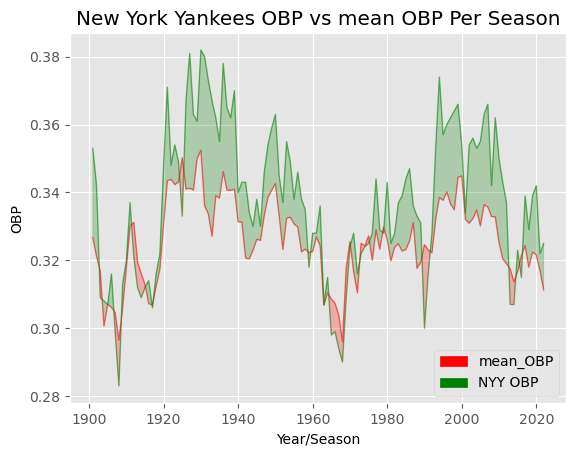

NYM was not yet in existance in 1871. The New York Mets were founded in 1962. 


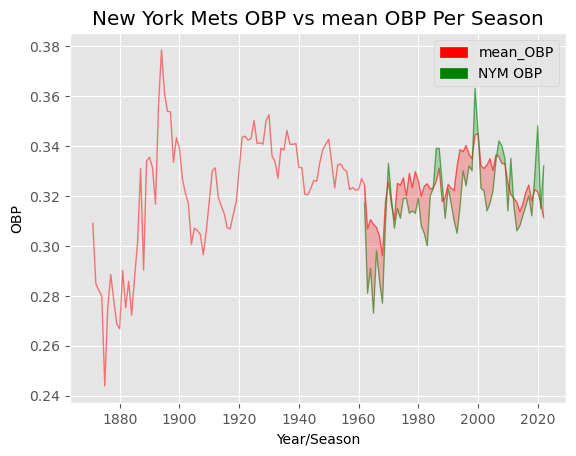

In [24]:
team_v_avg(column='OBP', df=teams, team='NYY', cutoff=True)
team_v_avg(column='OBP', df=teams, team='NYM', cutoff=False)

## Team Winning % when in top 5 for category

In [25]:
def team_winning_by_stat(column,team,vs='mean',start_year=1871,end_year=2023,cutoff=False,above_avg_instead=False):
    '''
    input desired column from datatable as a string
    input data table to search
    input specific team to compare against max/min/mean (default mean)
    input desired start and end years for searching
    input cutoff as T/F to shorten graph to only years team has played
    
    returns a graph showing the average value against
        the team value of the specified column for each year
    '''
    df = teams
    
    team = team.upper()
    
    if team not in df['franchID'].unique():
        raise ValueError(f'There is no team {team} in the database')
    
    # Prevent 150 lines of future warnings
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # Team's first year in the league
    tfy_index = (df['franchID'].values == team).argmax()
    tfy = teams.loc[teams.index == tfy_index]['yearID'].item()
    tfn = teams.loc[teams.index == tfy_index]['name'].item()
    
    # Team's Current Name
    tcn_index = len(teams['franchID']) - np.argmax(teams['franchID'][::-1].values==team) - 1
    team_full = teams.loc[teams.index == tcn_index]['name'].item()
       
    # Add cutoff functionality
    if start_year < tfy:
        start_year = tfy

    # Create an empty dataframe to store the results
    results_df = pd.DataFrame()

    # Loop through selected years in the dataframe
    for year in df.loc[(df["yearID"] >= start_year) & (df["yearID"] <= end_year)]["yearID"].unique():

        # Filter the dataframe to include only the data for the specified year
        current_year_df = df.loc[df["yearID"] == year]

        # Calculate the difference between the highest and lowest value in the specified column
        team_value = current_year_df.loc[current_year_df['franchID'] == team,column].max()
        team_w_pct = current_year_df.loc[current_year_df['franchID'] == team,'W_pct'].max()
        avg = round(current_year_df[column].mean(),3)
        if team_value >= avg:
            above_avg = True
        else:
            above_avg = False
        
        if team_value >= current_year_df.nlargest(5, [column])[column].min():
            top5 = True
        else:
            top5 = False
            
        # Append the results to the results dataframe
        results_df = results_df.append({"yearID": year, 
                                        f"mean_{column}":avg,
                                        f"{team} {column}":team_value,
                                        f"{team} W_pct":team_w_pct,
                                        "above_avg":above_avg,
                                        "top5": top5},
                                        ignore_index=True)
    
    # Convert year column into intgers
    results_df['yearID'] = results_df['yearID'].astype(int)
    
#     print(f"In the below years the {team_full} were above the league average for {column}:\n")
    
    if above_avg_instead:
        team_above = results_df.loc[results_df.above_avg == True,:]
        team_below = results_df.loc[results_df.above_avg != True,:]
        title = 'above the average'
    else:
        team_above = results_df.loc[results_df.top5 == True,:]
        team_below = results_df.loc[results_df.top5 != True,:]
        title = 'in the top 5'
    
    fig, ax = plt.subplots()
    line1 = plt.scatter(team_above['yearID'],team_above[f"{team} W_pct"],color='green')
    line2 = plt.scatter(team_below['yearID'],team_below[f"{team} W_pct"],color='red')
    line3 = plt.plot(results_df['yearID'],results_df[f"{team} W_pct"],color='blue',lw=0.5)
    plt.xlabel("Year/Season")
    plt.ylabel("Winning Percentage")
    plt.title(f"{team_full} Winning percentage vs when {column} is {title}")
    
    # Set Table parameters
    x1 = team_above['yearID'].values
    y1 = team_above[f"{team} W_pct"].values
    x2 = team_below['yearID'].values
    y2 = team_below[f"{team} W_pct"].values
    x3 = results_df['yearID'].values
    y3 = results_df[f"{team} W_pct"].values
    
    # Best Fit line using polyfit
    b1, m1 = polyfit(x1, y1, 1)
    line4 = plt.plot(x1, b1 + m1 * x1, color='green',linestyle='--', linewidth=2)
    b2, m2 = polyfit(x2, y2, 1)
    line5 = plt.plot(x2, b2 + m2 * x2, color='red',linestyle='--', linewidth=2)
#     b3, m3 = polyfit(x3, y3, 1)
#     line6 = plt.plot(x3, b3 + m3 * x3, color='blue',linestyle='--', linewidth=2)

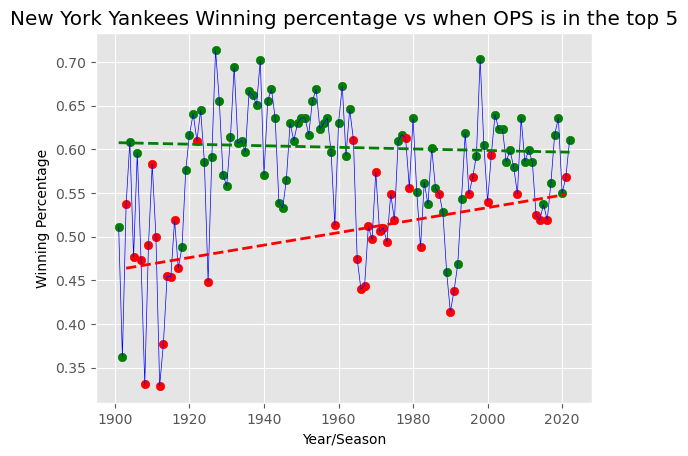

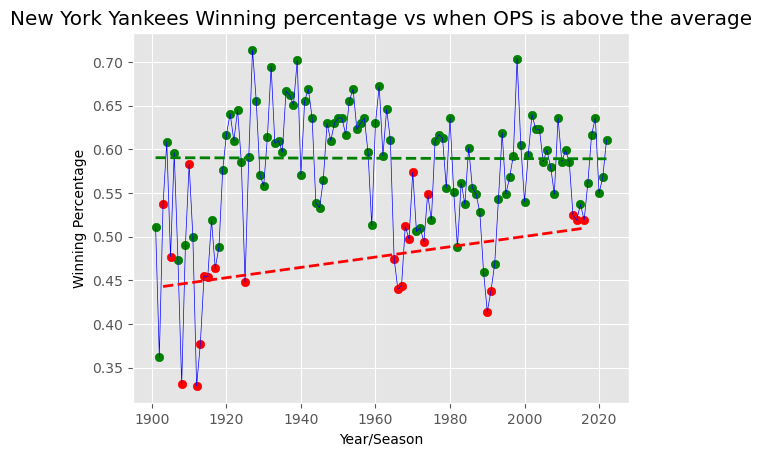

In [26]:
team_winning_by_stat('OPS','NYY')

team_winning_by_stat('OPS','NYY',above_avg_instead=True)

## New stat to add? ops/era  <--Did not include
compare this to WS championships

<BarContainer object of 120 artists>

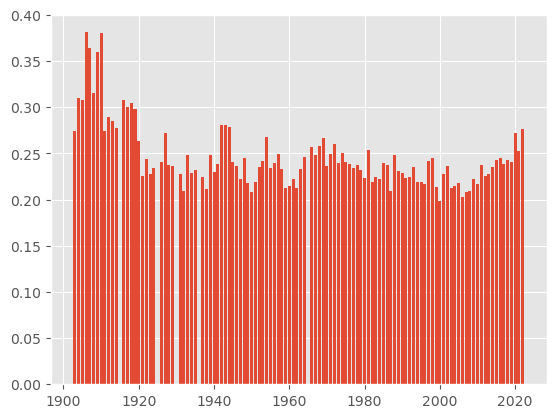

In [27]:
warnings.simplefilter(action='ignore', category=FutureWarning)

empty = pd.DataFrame()
for i in range(1903,2023):
    yearID = teams.loc[teams["OPS/ERA"]==teams.loc[teams.yearID==i]["OPS/ERA"].max()]["yearID"].max()
    name = teams.loc[teams["OPS/ERA"]==teams.loc[teams.yearID==i]["OPS/ERA"].max()]["name"].max()
    OPS = teams.loc[teams["OPS/ERA"]==teams.loc[teams.yearID==i]["OPS/ERA"].max()]['OPS'].max()
    ERA = teams.loc[teams["OPS/ERA"]==teams.loc[teams.yearID==i]["OPS/ERA"].max()]["ERA"].max()
    OPS_ERA = teams.loc[teams["OPS/ERA"]==teams.loc[teams.yearID==i]["OPS/ERA"].max()]["OPS/ERA"].max()
    WSWin = teams.loc[teams["OPS/ERA"]==teams.loc[teams.yearID==i]["OPS/ERA"].max()]["WSWin"].max()
    empty = empty.append({"yearID":yearID,"name":name,"OPS":OPS,"ERA":ERA,"OPS_ERA":OPS_ERA,"WSWin":WSWin},ignore_index=True)
empty

plt.bar(empty.yearID,empty.OPS_ERA)

In [28]:
empty.WSWin.value_counts()


N    88
Y    32
Name: WSWin, dtype: int64

In [29]:
top2=[]
top2index = teams.groupby("yearID")["OPS/ERA"].nlargest(2)

for i in range(304):
    top2.append(top2index.index[i][1])
teams.iloc[top2].loc[teams.yearID>=1903].WSWin.value_counts()

N    192
Y     48
Name: WSWin, dtype: int64

In [30]:
top1=[]
top1index = teams.groupby("yearID")["OPS/ERA"].nlargest(1)

for i in range(152):
    top1.append(top1index.index[i][1])
teams.iloc[top1].loc[teams.yearID>=1903].WSWin.value_counts()

N    90
Y    30
Name: WSWin, dtype: int64

No World Series in: 1904, 1914, 1915, 1994 1914/15 data messed up but yes world series


Modern ERA: 118 row but 116 games